<a href="https://colab.research.google.com/github/msuraj248/Django-Simple-website/blob/master/Linear%20and%20DNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import pandas as pd
df = pd.read_csv('datasets_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
y.head()

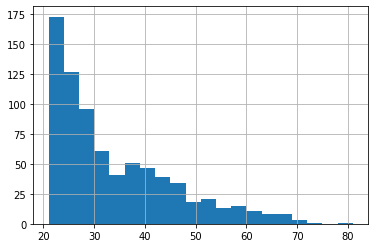

In [69]:
import matplotlib.pyplot as plt
# assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D']) for categorical data
num_preg = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc = tf.feature_column.numeric_column('Glucose')
dias_press = tf.feature_column.numeric_column('BloodPressure')
tricep = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')
df['Age'].hist(bins = 20)

In [71]:
bucket_age = tf.feature_column.bucketized_column(source_column = age, boundaries = [20,30,40,50,60,70,80])
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree, bucket_age]

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [ ]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train, y=y_train,batch_size=10, num_epochs=1000, shuffle=True)
Estimator = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)


In [ ]:
Estimator.train(input_fn=input_func, steps=1000)

In [ ]:
eval_input_fun = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size = 10, num_epochs = 1, shuffle = False)
Estimator.evaluate(eval_input_fun)

In [ ]:
pred_input_fun = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test, batch_size = 10, num_epochs = 1, shuffle = False)
prediction = Estimator.predict(pred_input_fun)
list(prediction)

In [ ]:
model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols, n_classes=2)
input_func1 = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)
model.train(input_fn = input_func1, steps = 1000)

In [ ]:
eval_input_func1 = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)
model.evaluate(input_fn=eval_input_fun)

In [ ]:
pred_input_func1 = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test ,batch_size=10, num_epochs=1, shuffle=False)
prediction = model.predict(input_fn=pred_input_fun)
list(prediction)

In [ ]:
final_pred = []
for input_fun in prediction:
    final_pred.append(input_fun['prediction'])
    
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_pred)** 0.5